16. Is delay determined by possible delay in the previous station? (Hint: this is a form of
autocorrelation).

In [1]:
import pandas as pd
from pathlib import Path
from pandas.api.types import is_datetime64_any_dtype as is_datetime
import numpy as np
import src.utils as utils
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize
import src.data_processing.data as data
from shapely.geometry import Point

In [2]:
full_trips_sorted = data.full_trips.sort_values(by = ['Train number' , 'Date of departure', 'Time of planned departure', ])
full_trips_sorted

,Unnamed: 0,Date of departure,Train number,Relation,Railway operators,Railway of departure,Time of real arrival,Time of real departure,Time of planned arrival,Time of planned departure,Direction of relation,Name of the stop,Railway of arrival,Date of planned arrival,Date of planned departure,Date of real arrival,Date of real departure,Delay time
13572,13572,2020-09-20,10,ICE,SNCB/NMBS,37,2020-09-20 20:36:30,2020-09-20 20:36:30,2020-09-20 20:29:00,2020-09-20 20:29:00,ICE: FRANKFURT(MAIN) HBF -> BRUSSEL-ZUID,hergenrath,37,2020-09-20,2020-09-20,2020-09-20,2020-09-20,450
13575,13575,2020-09-20,10,ICE,SNCB/NMBS,37,2020-09-20 20:47:50,2020-09-20 20:47:50,2020-09-20 20:40:00,2020-09-20 20:40:00,ICE: FRANKFURT(MAIN) HBF -> BRUSSEL-ZUID,chênée,3,2020-09-20,2020-09-20,2020-09-20,2020-09-20,470
14842,14842,2020-09-20,10,ICE,SNCB/NMBS,37,2020-09-20 20:48:43,2020-09-20 20:48:43,2020-09-20 20:41:00,2020-09-20 20:41:00,ICE: FRANKFURT(MAIN) HBF -> BRUSSEL-ZUID,angleur,37,2020-09-20,2020-09-20,2020-09-20,2020-09-20,463
14845,14845,2020-09-20,10,ICE,SNCB/NMBS,36,2020-09-20 20:51:05,2020-09-20 20:52:54,2020-09-20 20:44:00,2020-09-20 20:46:00,ICE: FRANKFURT(MAIN) HBF -> BRUSSEL-ZUID,liège-guillemins,37,2020-09-20,2020-09-20,2020-09-20,2020-09-20,425
14848,14848,2020-09-20,10,ICE,SNCB/NMBS,2,2020-09-20 20:56:54,2020-09-20 20:56:54,2020-09-20 20:51:00,2020-09-20 20:51:00,ICE: FRANKFURT(MAIN) HBF -> BRUSSEL-ZUID,ans,36,2020-09-20,2020-09-20,2020-09-20,2020-09-20,354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6358,6358,2020-09-20,19976,IC 19-2,SNCB/NMBS,94,2020-09-20 21:52:36,2020-09-20 21:53:06,2020-09-20 21:50:00,2020-09-20 21:50:00,IC 19-2: TOURNAI -> LILLE FLANDRES,froyennes,94,2020-09-20,2020-09-20,2020-09-20,2020-09-20,156
23009,23009,2020-09-26,19976,IC 19-2,SNCB/NMBS,94,NaT,2020-09-26 21:45:05,NaT,2020-09-26 21:44:00,IC 19-2: TOURNAI -> LILLE FLANDRES,tournai,NaN,NaT,2020-09-26,NaT,2020-09-26,0
23012,23012,2020-09-26,19976,IC 19-2,SNCB/NMBS,94,2020-09-26 21:49:52,2020-09-26 21:50:13,2020-09-26 21:48:00,2020-09-26 21:48:00,IC 19-2: TOURNAI -> LILLE FLANDRES,froyennes,94,2020-09-26,2020-09-26,2020-09-26,2020-09-26,112
23163,23163,2020-09-26,19979,IC 19-2,SNCB/NMBS,94,2020-09-26 07:16:42,2020-09-26 07:17:50,2020-09-26 07:17:00,2020-09-26 07:17:00,IC 19-2: LILLE FLANDRES -> TOURNAI,froyennes,94,2020-09-26,2020-09-26,2020-09-26,2020-09-26,0


In [3]:
## We cannot just autocorrelate on all trips or on all train numbers, because delay time determined by previous station delay time can only be for that day and that train number, so we take a subset
unique_trainNrs = full_trips_sorted['Train number'].unique()
routes = {}
for train_number in unique_trainNrs:
    routes[train_number] = data.full_trips[data.full_trips["Train number"] == train_number].sort_values(by= ["Date of real departure",  "Time of real departure"])
correlations = {}
for train_number in unique_trainNrs:
    correlations[train_number] = []
    for day in routes[train_number]["Date of real departure"].unique():
        correlations[train_number].append(routes[train_number][routes[train_number]["Date of real departure"] == day]["Delay time"].corr(routes[train_number][routes[train_number]["Date of real departure"] == day]["Delay time"].shift(1)))
correlations



C:\Users\jonav\anaconda3\lib\site-packages\numpy\lib\function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\jonav\anaconda3\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [19]:
sum = 0
len = 0
for train_number in unique_trainNrs:
    for val in correlations[train_number]:
        if np.isnan(val) != True:
            sum+= val
            len+=1


autocorr_mean = sum/len
autocorr_mean

0.4361720110978442

In [28]:
## We see, on average there is slight form of autocorrelation, meaning that the delay time in the station for that train and for that day is partly determined by the previous delay time: if there was delay time there, the delay time here is positively (increasingly) correlated
## make a scatterplot not correct yet
data_plot = []
data_y_plot = []
df = pd.DataFrame()
for train_number in unique_trainNrs:
    data_plot.append(train_number)
    data_y_plot.append(np.nanmean(correlations[train_number]))

data_plot
data_y_plot
pairs = pd.DataFrame(list(zip(data_plot, data_y_plot)), columns=['Train number', 'Mean correlation'])
pairs

C:\Users\jonav\AppData\Local\Temp\ipykernel_61064\2886870547.py:8: RuntimeWarning: Mean of empty slice
  data_y_plot.append(np.nanmean(correlations[train_number]))


,Train number,Mean correlation
0,10,0.535865
1,11,0.872874
2,12,0.825708
3,13,0.605748
4,14,0.697281
...,...,...
4362,19973,NaN
4363,19974,NaN
4364,19975,NaN
4365,19976,NaN


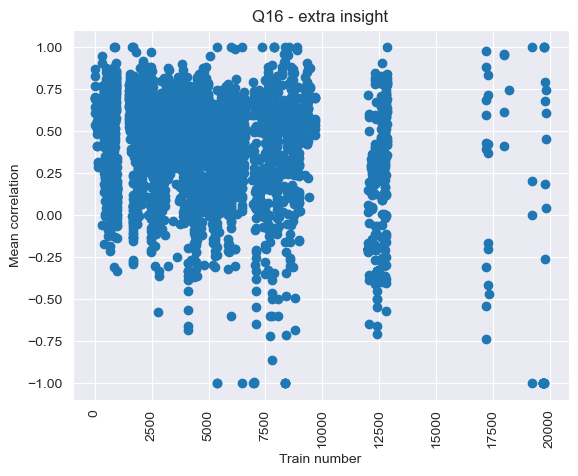

In [31]:
plt.figure(facecolor="white")
plt.scatter('Train number', 'Mean correlation', data = pairs)
plt.title("Q16 - extra insight")
plt.xlabel("Train number")
plt.ylabel("Mean correlation")
plt.xticks(rotation="vertical")
plt.show()